In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## Linear Regression with one variable

In [3]:
data = np.loadtxt('data/ex1data1.txt',delimiter=',')
data[:5]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

In [16]:
x = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

In [18]:
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [19]:
y[:5]

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233]])

Text(0,0.5,'Profit in 10k')

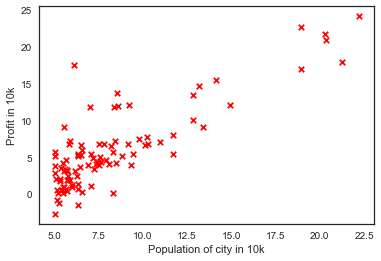

In [21]:
plt.scatter(x[:,1],y,s=30,c='r',marker='x',linewidths=1)
plt.xlabel('Population of city in 10k')
plt.ylabel('Profit in 10k')

# Gradient Descent

In [51]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0.0
    
    h = X.dot(theta)
    
    J = np.sum(np.square(h-y))/2*m
    return(J)

In [52]:
computeCost(x,y)

301772.35305298044

In [65]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(X.T.dot(h-y))/m
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

('theta: ', array([-3.63029144,  1.16636235]))


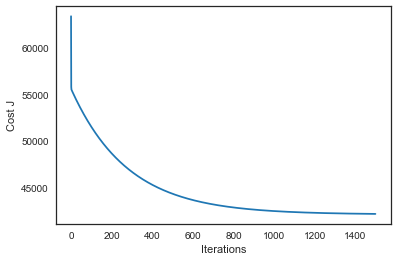

In [66]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(x, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

# Scikit learn linear regression

In [67]:
regr = LinearRegression()
regr.fit(x[:,1].reshape(-1,1),y.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

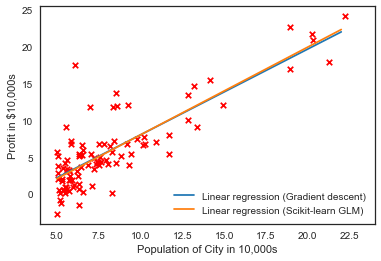

In [68]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(x[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [69]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]
